In [12]:
# print(imu_data)
# print(np.array(imu_data["header.stamp.secs"]), len(np.array(imu_data["header.stamp.secs"])))
# print(np.array(imu_data["orientation.x"]))
# print(np.array(imu_data["orientation.y"]))
# print(np.array(imu_data["orientation.z"]))
# print(np.array(imu_data["orientation.w"]))

imu_frame = np.vstack((np.array(imu_data["header.stamp.secs"]),
                    np.array(imu_data["orientation.x"]), 
                    np.array(imu_data["orientation.y"]), 
                    np.array(imu_data["orientation.z"]), 
                    np.array(imu_data["orientation.w"])))

# print(imu_frame.shape)

imu_frame = np.vstack((np.array(imu_data["header.stamp.secs"]),
                    np.array(imu_data["orientation.x"]), 
                    np.array(imu_data["orientation.y"]), 
                    np.array(imu_data["orientation.z"]), 
                    np.array(imu_data["orientation.w"])))

# print(radar_data)
# print(np.array(radar_data["header.stamp.secs"])[0:400])

# print(np.array(radar_data["header.stamp.secs"]))
indices = np.where(np.array(radar_data["header.stamp.secs"]) == 1700026234)[0]
# print(indices)

# print(np.array(radar_data["point_id"])[0:10])
# print(np.array(radar_data["range"]))

radar_bins = []
current_bin = []

for i in range(len(radar_data)):
    point = radar_data.iloc[i]
    if point['point_id'] == 0 and current_bin:
        radar_bins.append(pd.DataFrame(current_bin))
        current_bin = []
    current_bin.append(point)

# if current_bin:
#     radar_bins.append(pd.DataFrame(current_bin))
print(radar_bins[0])
print(len(radar_bins))
print(radar_bins[1])




            Time  header.seq  header.stamp.secs  header.stamp.nsecs  \
0   1.700026e+09      269045         1700026234           761811310   
1   1.700026e+09      269046         1700026234           761954848   
2   1.700026e+09      269047         1700026234           761994326   
3   1.700026e+09      269048         1700026234           762172082   
4   1.700026e+09      269049         1700026234           762208487   
5   1.700026e+09      269050         1700026234           762243434   
6   1.700026e+09      269051         1700026234           762275412   
7   1.700026e+09      269052         1700026234           762307755   
8   1.700026e+09      269053         1700026234           762339369   
9   1.700026e+09      269054         1700026234           762371087   
10  1.700026e+09      269055         1700026234           762403430   
11  1.700026e+09      269056         1700026234           762434783   
12  1.700026e+09      269057         1700026234           762460251   
13  1.

In [33]:
from bagpy import bagreader
import pandas as pd
import numpy as np

b = bagreader("preset2_9.2deg.bag")
radar_topic = '/ti_mmwave/radar_scan'
csv_path = b.message_by_topic(radar_topic)
radar_data = pd.read_csv(csv_path)

b = bagreader("preset2_9.2deg.bag")
imu_topic = '/foot2/imu/data'
csv_path = b.message_by_topic(imu_topic)
imu_data = pd.read_csv(csv_path)
print(b.topic_table)


# Assuming radar_bins is a list of DataFrames, each representing radar data for a specific time frame
# imu_data is a DataFrame containing IMU data with 'header.stamp.secs' and 'header.stamp.nsecs' columns

blocks = []

# Function to calculate time difference in nanoseconds
def calculate_time_diff(radar_secs, radar_nsecs, imu_secs, imu_nsecs):
    return abs((radar_secs - imu_secs) * 1e9 + (radar_nsecs - imu_nsecs))

for each in radar_bins:
    block = []
    
    for i in range(each.shape[0]):  # Assuming 'each' is a DataFrame
        position = np.array([each["x"].iloc[i], each["y"].iloc[i], each["z"].iloc[i]])
        
        # Calculate time difference for each IMU record
        time_diffs = calculate_time_diff(each["header.stamp.secs"].iloc[i], each["header.stamp.nsecs"].iloc[i],
                                         imu_data["header.stamp.secs"], imu_data["header.stamp.nsecs"])
        
        # Find the index of the minimum time difference
        closest_imu_index = np.argmin(time_diffs)
        
        # Get the closest IMU orientation data
        orientation = np.array([imu_data["orientation.x"].iloc[closest_imu_index], 
                                imu_data["orientation.y"].iloc[closest_imu_index], 
                                imu_data["orientation.z"].iloc[closest_imu_index]])
        
        # Append position and orientation to the block
        block.append(np.concatenate((position, orientation)))
    
    blocks.append(np.array(block))




Block 0 shape: (40, 6)
Block 1 shape: (38, 6)
Block 2 shape: (37, 6)
Block 3 shape: (34, 6)
Block 4 shape: (37, 6)
Block 5 shape: (40, 6)
Block 6 shape: (35, 6)
Block 7 shape: (35, 6)
Block 8 shape: (34, 6)
Block 9 shape: (35, 6)
Block 10 shape: (35, 6)
Block 11 shape: (35, 6)
Block 12 shape: (37, 6)
Block 13 shape: (35, 6)
Block 14 shape: (35, 6)
Block 15 shape: (37, 6)
Block 16 shape: (34, 6)
Block 17 shape: (36, 6)
Block 18 shape: (39, 6)
Block 19 shape: (38, 6)
Block 20 shape: (36, 6)
Block 21 shape: (31, 6)
Block 22 shape: (30, 6)
Block 23 shape: (30, 6)
Block 24 shape: (36, 6)
Block 25 shape: (38, 6)
Block 26 shape: (37, 6)
Block 27 shape: (38, 6)
Block 28 shape: (36, 6)
Block 29 shape: (36, 6)
Block 30 shape: (31, 6)
Block 31 shape: (31, 6)
Block 32 shape: (34, 6)
Block 33 shape: (32, 6)
Block 34 shape: (31, 6)
Block 35 shape: (33, 6)
Block 36 shape: (30, 6)
Block 37 shape: (36, 6)
Block 38 shape: (36, 6)
Block 39 shape: (35, 6)
Block 40 shape: (37, 6)
Block 41 shape: (36, 6)
Bl

In [38]:
from bagpy import bagreader
import pandas as pd
import numpy as np
import os

def calculate_time_diff(radar_secs, radar_nsecs, imu_secs, imu_nsecs):
    return abs((radar_secs - imu_secs) * 1e9 + (radar_nsecs - imu_nsecs))

def process_bag_file(bag_file_path, radar_topic, imu_topic):
    b = bagreader(bag_file_path)
    csv_path = b.message_by_topic(radar_topic)
    radar_data = pd.read_csv(csv_path)
    csv_path = b.message_by_topic(imu_topic)
    imu_data = pd.read_csv(csv_path)

    radar_bins = []
    current_bin = []

    for i in range(len(radar_data)):
        point = radar_data.iloc[i]
        if point['point_id'] == 0 and current_bin:
            radar_bins.append(pd.DataFrame(current_bin))
            current_bin = []
        current_bin.append(point)

    blocks = []
    
    for each in radar_bins:
        block = []
        
        for i in range(each.shape[0]):  # Assuming 'each' is a DataFrame
            position = np.array([each["x"].iloc[i], each["y"].iloc[i], each["z"].iloc[i]])
            
            # Calculate time difference for each IMU record
            time_diffs = calculate_time_diff(each["header.stamp.secs"].iloc[i], each["header.stamp.nsecs"].iloc[i],
                                            imu_data["header.stamp.secs"], imu_data["header.stamp.nsecs"])
            
            # Find the index of the minimum time difference
            closest_imu_index = np.argmin(time_diffs)
            
            # Get the closest IMU orientation data
            orientation = np.array([imu_data["orientation.x"].iloc[closest_imu_index], 
                                    imu_data["orientation.y"].iloc[closest_imu_index], 
                                    imu_data["orientation.z"].iloc[closest_imu_index]])
            
            # Append position and orientation to the block
            block.append(np.concatenate((position, orientation)))
        
        blocks.append(np.array(block))

    return blocks

def extract_label_from_filename(filename):
    # Example name "preset2_9.2deg.bag"
    label_str = filename.split('_')[1].replace('deg.bag', '')
    try:
        label = float(label_str)
    except ValueError:
        print(f"Could not convert '{label_str}' to float.")
        label = None
    print(label)
    return label

bag_files_directory = 'D:\REPOS\mmw\Experiment02-ML'
bag_files = [os.path.join(bag_files_directory, f) for f in os.listdir(bag_files_directory) if f.endswith('.bag')]
radar_topic = '/ti_mmwave/radar_scan'
imu_topic = '/foot2/imu/data'

for bag_file in bag_files:
    blocks = process_bag_file(bag_file, radar_topic, imu_topic)
    label = extract_label_from_filename(bag_file)
    
    # Save blocks with label logic here


<>:65: SyntaxWarning: invalid escape sequence '\R'
<>:65: SyntaxWarning: invalid escape sequence '\R'
C:\Users\ianja\AppData\Local\Temp\ipykernel_25264\3753206869.py:65: SyntaxWarning: invalid escape sequence '\R'
  bag_files_directory = 'D:\REPOS\mmw\Experiment02-ML'


[INFO]  Data folder D:\REPOS\mmw\Experiment02-ML\preset2_9.2deg already exists. Not creating.


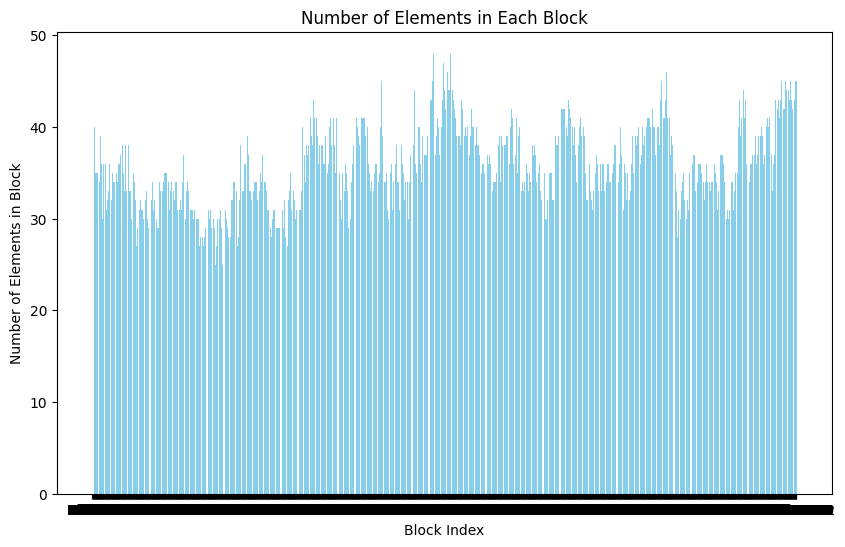

In [34]:
import matplotlib.pyplot as plt

block_lengths = [block.shape[0] for block in blocks]
plt.figure(figsize=(10, 6))
plt.bar(range(len(block_lengths)), block_lengths, color='skyblue')
plt.xlabel('Block Index')
plt.ylabel('Number of Elements in Block')
plt.title('Number of Elements in Each Block')
plt.xticks(range(len(block_lengths)), labels=[f"Block {i}" for i in range(len(block_lengths))])
plt.show()

25
48


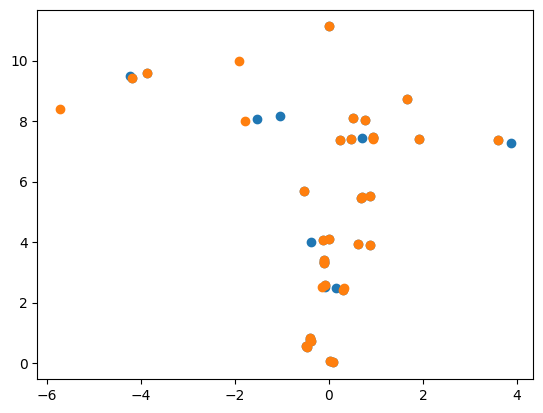

In [17]:
list1 = []
for all in radar_bins:
    list1.append(len(all["x"]))

print(min(list1))
print(max(list1))   
import matplotlib.pyplot as plt
plt.scatter(np.array(radar_bins[0]["y"]), np.array(radar_bins[0]["x"]))
plt.scatter(np.array(radar_bins[1]["y"]), np.array(radar_bins[1]["x"]))